In [90]:
# qualify on member status active only:

In [91]:
# import numpy and pandas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 90)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

### upload .png files

In [92]:
br = '\n'
# upload files

df = np.load('data/df.npy')
df_features = np.load('data/features.npy')

In [93]:
print(df_features)

['Household_Key' 'Individual_Key' 'City' 'State_Grouped' 'ZIP5' 'ZIP9'
 'FSV_CMSI_Flag' 'FSV_Credit_Card_Flag' 'FSV_Deposit_Program_Flag'
 'FSV_Home_Equity_Flag' 'FSV_ID_Theft_Flag' 'FSV_Mortgage_Flag'
 'INS_Client_Flag' 'TRV_Globalware_Flag' 'Number_of_Children'
 'Responded_to_Catalog' 'Race' 'Length_Of_Residence' 'Mail_Responder'
 'Home_Owner' 'Income' 'Date_Of_Birth' 'Age' 'Children' 'Education'
 'Dwelling_Type' 'Credit_Ranges' 'Language' 'Gender' 'Branch_Name'
 'County' 'Join_AAA_Date' 'Member_Phone_Type' 'Member_Status'
 'Member_Tenure_Years' 'Member_Type' 'Reinstate_Date' 'Renew_Method' 'ZIP'
 'Mosaic_Household' 'Mosaic_Global_Household' 'kcl_B_IND_MosaicsGrouping'
 'New_Mover_Flag' 'Occupation_Code' 'Occupation_Group'
 'Right_Dwelling_Type' 'Move_Distance' 'Occupant_Type' 'Membership_Level'
 'Roadside_Service' '_memeber_count' '_service_cnt' '_total_cost'
 '_total_products' '_ERS_ENT_Count_Year_1' '_ERS_ENT_Count_Year_2'
 '_ERS_ENT_Count_Year_3' '_ERS_Member_Cost_Year_1'
 '_ERS_

In [94]:
dfv = pd.DataFrame(df, columns=df_features)
dfv.head()

  Household_Key Individual_Key      City State_Grouped           ...            \
0           875         717785  CRANSTON            RI           ...             
1           969          19943  JOHNSTON            RI           ...             
2          8718         199385  CRANSTON            RI           ...             
3         11524       52285851  JOHNSTON            RI           ...             
4         13422      170834500  COVENTRY            RI           ...             

  _ERS_ENT_Count_Year_3 _ERS_Member_Cost_Year_1 _ERS_Member_Cost_Year_2  \
0                     9                  2118.6                  2118.6   
1                    27                       0                  940.85   
2                     0                       0                       0   
3                     1                       0                       0   
4                     0                   58.85                       0   

  _ERS_Member_Cost_Year_3  
0                 3197.57  


In [95]:
dfv['Member_Status'].unique()
df_temp = dfv[dfv['Member_Status'] == 'ACTIVE'].copy()

In [96]:
# # select the columns from above data
# li =  ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 
#        'New_Mover_Flag', 'Education', 'Dwelling_Type', '_total_products']
# li


In [97]:
li = ['Home_Owner', 'Age', 'Length_Of_Residence', \
      'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type', '_total_products']
li

['Home_Owner',
 'Age',
 'Length_Of_Residence',
 'Member_Tenure_Years',
 'New_Mover_Flag',
 'Credit_Ranges',
 'Children',
 'Education',
 'Dwelling_Type',
 '_total_products']

In [98]:
df1= df_temp[li].copy()
df2 = df1.dropna()
subdf = df2.drop_duplicates()
print("subset df shape:", subdf.shape, " orignal df shape:", df.shape )


subset df shape: (1971, 10)  orignal df shape: (3219, 60)


In [99]:
# percentile list 
perc =[.20, .40, .60, .80] 
# list of dtypes to include 
include =['object', 'float', 'int'] 
desc = subdf.describe(percentiles = perc, include = include) 
print(desc.iloc[:,0:5])
print("--"*50)
print(desc.iloc[:,6:11])


        Home_Owner   Age  Length_Of_Residence  Member_Tenure_Years New_Mover_Flag
count         1971  1971                 1971                 1971           1971
unique           4    68                   32                   77              2
top     Home.Owner    75                   15                   47              N
freq          1903   226                 1039                  355           1917
----------------------------------------------------------------------------------------------------
       Children     Education Dwelling_Type  _total_products
count      1971          1971          1971             1971
unique        2             5             4                7
top          No  Some.College          SFDU                0
freq       1040           579          1700             1213


# X,y

In [100]:
def yes_or_no(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return np.NaN  

In [101]:
# data_X
select_col = li[:-1]
print(select_col)
print("--"*50)
y_col = li[-1]
print("target y:", y_col)

#split the dataset to X & y:
X = subdf.drop([y_col], axis=1).values
fix_y = subdf[y_col].apply(yes_or_no)
#fix_y = subdf[y_col].copy()
print("max y:", fix_y.max())
y = fix_y.values
print("y is", y)

# data_X contains only X
data_X = subdf[select_col].copy()
print(data_X.head())

['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
target y: _total_products
max y: 1
y is [0 1 1 ... 0 0 1]
   Home_Owner Age Length_Of_Residence Member_Tenure_Years      ...      Credit_Ranges  \
1  Home.Owner  77                  15                  54      ...               800+   
2  Home.Owner  68                  15                  13      ...               800+   
3  Home.Owner  76                  15                  44      ...            700-749   
4  Home.Owner  70                  15                  49      ...            650-699   
6  Home.Owner  73                  15                  14      ...            750-799   

  Children         Education Dwelling_Type  
1       No       High.School          SFDU  
2       No      Some.College          SFDU  
3       No       High.Scho

### Machine Learning algorithms only operate on numberical data

In [102]:
subdf[select_col].iloc[50]

Home_Owner               Home.Owner
Age                              70
Length_Of_Residence              13
Member_Tenure_Years              47
New_Mover_Flag                    N
Credit_Ranges               700-749
Children                        Yes
Education              Some.College
Dwelling_Type                  SFDU
Name: 86, dtype: object

### Encoding

In [103]:
# columns numbers only 
data_X['Member_Tenure_Years'].astype(int)
cat_vars = ['Home_Owner', 'Education', 'Dwelling_Type', 'New_Mover_Flag', 'Credit_Ranges', 'Children']
print("selected columns:", cat_vars)

data_new = pd.get_dummies(data_X, columns=cat_vars)
data_new.columns
#print("features: \n", list(data_new))

selected columns: ['Home_Owner', 'Education', 'Dwelling_Type', 'New_Mover_Flag', 'Credit_Ranges', 'Children']


Index(['Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'Home_Owner_Home.Owner',
       'Home_Owner_Probable.Home.Owner', 'Home_Owner_Probable.Renter',
       'Home_Owner_Renter', 'Education_Completed.College', 'Education_Graduated.School',
       'Education_High.School', 'Education_Some.College', 'Education_Unknown',
       'Dwelling_Type_Large.multi.family', 'Dwelling_Type_P.O.BOX', 'Dwelling_Type_SFDU',
       'Dwelling_Type_Small.or.large.multi.family', 'New_Mover_Flag_N',
       'New_Mover_Flag_Y', 'Credit_Ranges_499.Less', 'Credit_Ranges_500-549',
       'Credit_Ranges_550-599', 'Credit_Ranges_600-649', 'Credit_Ranges_650-699',
       'Credit_Ranges_700-749', 'Credit_Ranges_750-799', 'Credit_Ranges_800+',
       'Credit_Ranges_Unknown', 'Children_No', 'Children_Yes'],
      dtype='object')

In [104]:
X = data_new
y = y
print(X.shape, y.shape)
print("--"*50)
attributes = list(data_X)
print("X attributes: \n", attributes)
print("--"*50)
print(X.head())

(1971, 29) (1971,)
----------------------------------------------------------------------------------------------------
X attributes: 
 ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 'New_Mover_Flag', 'Credit_Ranges', 'Children', 'Education', 'Dwelling_Type']
----------------------------------------------------------------------------------------------------
  Age Length_Of_Residence Member_Tenure_Years  Home_Owner_Home.Owner      ...       \
1  77                  15                  54                      1      ...        
2  68                  15                  13                      1      ...        
3  76                  15                  44                      1      ...        
4  70                  15                  49                      1      ...        
6  73                  15                  14                      1      ...        

   Credit_Ranges_800+  Credit_Ranges_Unknown  Children_No  Children_Yes  
1                   1      

In [105]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=0,n_estimators=100)
# Train the classifier
rf.fit(X,y)
# Print the name and gini importance of each feature
feat_labels = attributes
feat_list=[]
for feature in zip(feat_labels, rf.feature_importances_):
    feat_list.append(feature)

feat_list.sort(key=lambda x:x[1], reverse=True) #To sort by first element of the tuple   
ds = pd.DataFrame(feat_list)
ds.columns =[['cols','imp']]
ds

                  cols       imp
0           Home_Owner  0.302942
1  Length_Of_Residence  0.282347
2                  Age  0.144927
3            Education  0.017073
4        Dwelling_Type  0.007014
5  Member_Tenure_Years  0.006332
6             Children  0.006290
7        Credit_Ranges  0.000140
8       New_Mover_Flag  0.000138

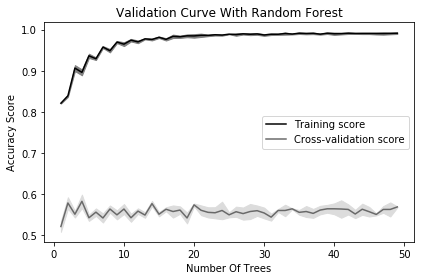

Train Mean: 0.9726503279711386
Test Mean: 0.556908591372565


In [108]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve


# Create range of values for parameter
param_range = np.arange(1, 50, 1)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)



# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

print("Train Mean:", train_mean.mean())
print("Test Mean:", test_mean.mean())